# PRÁCTICA 1 - APRENDIZAJE SUPERVISADO - PREPROCESADO

## 0. Indice
0. [Indice](#0-indice)
1. [Importación de Librerias, Lectura y Configuración](#11-importacion-lectura-y-configuracion)
2. [Entendimiento del DataFrame](#12-entendimiento-del-dataframe)
3. [Limpieza de los datos](#13-limpieza-de-los-datos)
    1. [Valores Nulos Numéricos](#131-valores-nulos-numericos)
    2. [Tratamiento de Columnas Nominales](#132-tratamiento-de-columnas-nominales)
        - [Tratamiento con Mapeo](#1321-tratamiento-por-mapeo)
        - [Tratamiento con OneHot-Encoding](#1322-tratamiento-con-onehot-encoding)
    3. [Tratamiento de Columnas Booleanas](#133-tratamiento-de-columnas-booleanas)
    4. [Tratamiento de Columnas DataTime](#134-tratamiento-de-columna-datatime)
4. [Combinación de Celdas por Cliente](#14-combinacion-de-celdas-por-cliente)
5. [Normalización de los Datos](#15-normalizacion-de-los-datos)
6. [Selección de Características](#16-seleccion-de-caracteristicas)
    1. [Filtro](#161-filtro)
        - [Chi^2](#1611-chi2)
        - [Mutual Information](#1612-mutual-information)
        - [Análisis de Varianza](#1613-analisis-de-varianza)
    2. [Wrapper](#162-wrapper)
        - [RFE - Recursive Feature Eliminator](#1621-recursive-feature-eliminator-rfe)
        - [RFECV - Recursive Feature Eliminator With Cross Validation](#1622-recursive-deature-elimination-with-cross-validation-rfecv)
        - [SFS - Sequential Feature Selector](#1623-sequential-feature-selector-sfs)
    3. [Embebido](#163-embebido)
7. [Tratamiento de los datos Desbalanceados](#17-tratamiento-de-los-datos-desbalanceados)
8. [Separación en Entrenamiento y Test](#18-separacion-en-entrenamiento-y-test)

## 1.1. Importacion, Lectura y Configuracion
[Volver al Indice](#indice)

Aqui nos encargamos de importar las librerias para hacer el preprocesado.<br>También hemos tocado alguna configuración para facilitar el visualizado de los datos.

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv("./data/train_data_0.csv")
df_label = pd.read_csv("./data/train_labels_0.csv")

In [126]:
# enseñar todas las columnas / si quiero todas las filas max_rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1.2. Entendimiento del DataFrame

Vamos a intentar entender en que consiste el dataframe que nos han dado. Lo primero que vamos a ver es el tamaño del data set y los 5 primeros valores para ver a los que nos estamos enfrentando.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499998 entries, 0 to 499997
Columns: 190 entries, ID to Infraction_DNOU
dtypes: float64(182), int64(1), object(7)
memory usage: 724.8+ MB


In [128]:
df.describe()

,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_SBF,Infraction_ZWWJ,Infraction_QJJF,Base_76065,Infraction_EJZ,Base_6872,Risk_0322,Infraction_FMXQ,Infraction_GGO,Infraction_TLPJ,Infraction_NCB,Base_1165,Base_39598,Base_6187,Infraction_CLLY,Infraction_ZTNC,Base_85131,Risk_9995,Infraction_AYWV,Payment_22507,Base_9516,Infraction_GWL,Expenditure_YTR,Base_36384,Expenditure_FIP,Infraction_PAS,Risk_0003,Expenditure_HMO,Base_24406,Expenditure_LMSR,Infraction_BSU,Infraction_GEL,Base_14808,Risk_8065,Infraction_ZYW,Expenditure_KMW,Base_1039,Infraction_HSSU,Infraction_EHZP,Infraction_TBP,Base_0580,Expenditure_RGD,Infraction_PBC,Infraction_AQO,Base_0229,Base_8318,Base_69608,Base_91828,Infraction_HPS,Base_6852,Expenditure_IDZ,Risk_1475,Expenditure_BWX,Base_8511,Infraction_JYZB,Base_22178,Infraction_ZTYG,Infraction_ZVW,Infraction_EYU,Expenditure_UWVG,Base_3041,Infraction_JVWF,Payment_3207,Infraction_QKZN,Infraction_CZE,Infraction_APIU,Base_65352,Risk_7095,Infraction_JBR,Base_66195,Base_36516,Infraction_RXQH,Infraction_HFU,Risk_6346,Risk_5797,Expenditure_HRQ,Infraction_VTR,Risk_2102,Risk_4804,Base_7331,Infraction_XWX,Infraction_FUSM,Expenditure_XDD,Risk_4553,Base_67585,Risk_8742,Infraction_VHU,Risk_4247,Risk_2380,Infraction_GSS,Risk_0454,Base_8379,Base_8730,Expenditure_HKXV,Infraction_MHM,Infraction_IRKE,Risk_4160,Risk_3506,Infraction_WEG,Base_23737,Expenditure_GCAO,Risk_9367,Base_7910,Expenditure_GMC,Risk_9423,Risk_6977,Base_9103,Infraction_KSBR,Risk_6178,Risk_6197,Infraction_NRBQ,Infraction_WVC,Infraction_QVSL,Infraction_QXUM,Risk_8532,Risk_9247,Infraction_IMIM,Expenditure_UIWS,Expenditure_ONEG,Expenditure_MTRQ,Expenditure_LAHK,Expenditure_HPM,Infraction_LTIS,Infraction_HFSI,Infraction_ETH,Infraction_ZVHJ,Infraction_ANHZ,Infraction_SDWM,Base_5441,Base_2810,Risk_4561,Risk_8902,Infraction_HPLO,Infraction_PTY,Infraction_QGC,Infraction_EBA,Base_64022,Infraction_BGGU,Base_4569,Expenditure_BEH,Infraction_LMHK,Infraction_NMCB,Infraction_TPAF,Infraction_ZRH,Infraction_XEPQ,Infraction_ZMKI,Infraction_WIS,Infraction_RKTA,Infraction_IIZ,Infraction_WVAW,Infraction_KEJT,Infraction_TFOY,Infraction_WMAQ,Infraction_SIA,Infraction_CZXL,Infraction_QEY,Base_52892,Base_3958,Infraction_HUK,Infraction_VHHP,Infraction_WLMI,Infraction_LIES,Risk_5270,Infraction_SVKR,Infraction_MAN,Infraction_WWLN,Infraction_ADWZ,Infraction_MZI,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_ZTLC,Infraction_LSX,Infraction_IBJ,Infraction_DNOU
count,495690.000000,4.999980e+05,499998.000000,499816.000000,4.999980e+05,407434.000000,4.998160e+05,4.998160e+05,72853.000000,3.495080e+05,4.750000e+05,4.999980e+05,499816.000000,4.999980e+05,4.999980e+05,390201.000000,499998.000000,434769.000000,50322.000000,499985.000000,499998.000000,4.979010e+05,217010.000000,4.999980e+05,4.999980e+05,4.999980e+05,497363.000000,472321.000000,499998.000000,1.304550e+05,4.999980e+05,4.999980e+05,4.999980e+05,499816.000000,4.999980e+05,407434.000000,4.999980e+05,4.999980e+05,483014.000000,229151.000000,4.955350e+05,4.999980e+05,4.999980e+05,234994.000000,499998.000000,490296.000000,4.999980e+05,446041.000000,499440.000000,499998.000000,431256.000000,4.999980e+05,4.998160e+05,2.168570e+05,4.999980e+05,4.998160e+05,57148.000000,4.998160e+05,499998.000000,4.999980e+05,4.999980e+05,4.999980e+05,4.823900e+05,4.998160e+05,4.915410e+05,4.999980e+05,4.979150e+05,499998.000000,4.999980e+05,4986.000000,4.999980e+05,4.980930e+05,4.999980e+05,56210.000000,4.999980e+05,4.999980e+05,271628.000000,499440.000000,4.998160e+05,4.750000e+05,4.932150e+05,4.999980e+05,2.879800e+04,4.999980e+05,4.980930e+05,4.999980e+05,4.999980e+05,4.998160e+05,4.976470e+05,1.326980e+05,4.999980e+05,499996.000000,499998.000000,4.999980e+05,4.823900e+05,4.999980e+05,4.999980e+05,4.973630e+05,4.999980e+05,3.447800e+04,499816.000000,4.999980e+05,4.999980e+05,330.0,4.999980e+05,4.999980e+05,602.000000,499998.000000,4.999980e+05,4.999980e+05,4.999980e+05,4.999980e+05,4.999910e+05

In [129]:
df.head()

,ID,Expenditure_AHF,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_SBF,Infraction_ZWWJ,Infraction_QJJF,Base_76065,Infraction_EJZ,Base_6872,Risk_0322,Infraction_FMXQ,Infraction_GGO,Infraction_TLPJ,Infraction_NCB,Base_1165,Base_39598,Base_6187,Infraction_CLLY,Infraction_ZTNC,Base_85131,Risk_9995,Infraction_AYWV,Payment_22507,Base_9516,Infraction_GWL,Expenditure_YTR,Base_36384,Expenditure_FIP,Infraction_PAS,Risk_0003,Expenditure_HMO,Base_24406,Expenditure_LMSR,Infraction_BSU,Infraction_GEL,Base_14808,Risk_8065,Infraction_ZYW,Expenditure_KMW,Base_1039,Infraction_HSSU,Infraction_EHZP,Infraction_TBP,Base_0580,Expenditure_RGD,Infraction_PBC,Infraction_YFSG,Infraction_DQLY,Infraction_AQO,Base_0229,Base_8318,Base_69608,Base_91828,Infraction_HPS,Base_6852,Infraction_CLH,Expenditure_IDZ,Risk_1475,Expenditure_BWX,Base_8511,Infraction_JYZB,Base_22178,Infraction_ZTYG,Infraction_ZVW,Infraction_EYU,Expenditure_UWVG,Base_3041,Infraction_JVWF,Payment_3207,Infraction_QKZN,Infraction_CZE,Infraction_APIU,Base_65352,Risk_7095,Infraction_JBR,Base_66195,Base_36516,Infraction_RXQH,Infraction_HFU,Risk_6346,Risk_5797,Expenditure_HRQ,Infraction_VTR,Risk_2102,Risk_4804,Base_7331,Infraction_XWX,Infraction_FUSM,Expenditure_XDD,Risk_4553,Base_67585,Risk_8742,Infraction_VHU,Risk_4247,Risk_2380,Infraction_GSS,Risk_0454,Base_8379,Base_8730,Expenditure_HKXV,Infraction_MHM,Infraction_IRKE,Risk_4160,Risk_3506,Infraction_WEG,Base_23737,Expenditure_GCAO,Risk_9367,Base_7910,Expenditure_GMC,Risk_9423,Risk_6977,Base_9103,Infraction_KSBR,Risk_6178,Risk_6197,Infraction_NRBQ,Infraction_WVC,Infraction_QVSL,Infraction_QXUM,Risk_8532,Risk_9247,Infraction_IMIM,Expenditure_UIWS,Expenditure_ONEG,Expenditure_MTRQ,Expenditure_LAHK,Expenditure_HPM,Infraction_LTIS,Infraction_HFSI,Infraction_ETH,Infraction_ZVHJ,Infraction_ANHZ,Infraction_SDWM,Base_5441,Base_2810,Risk_4561,Risk_8902,Base_67254,Infraction_HPLO,Infraction_PTY,Infraction_QGC,Infraction_EBA,Base_64022,Infraction_BGGU,Base_4569,Expenditure_BEH,Infraction_LMHK,Infraction_NMCB,Infraction_TPAF,Infraction_ZRH,Infraction_TEN,Infraction_XEPQ,Infraction_ZMKI,Infraction_WIS,Infraction_RKTA,Infraction_IIZ,Infraction_WVAW,Infraction_KEJT,Infraction_TFOY,Infraction_WMAQ,Infraction_SIA,Infraction_CZXL,Infraction_QEY,Base_52892,Base_3958,Infraction_HUK,Infraction_VHHP,Infraction_WLMI,Infraction_LIES,Risk_5270,Infraction_SVKR,Infraction_MAN,Infraction_WWLN,Infraction_ADWZ,Infraction_MZI,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_ZTLC,Infraction_LSX,Infraction_IBJ,Infraction_DNOU
0,3333337004103300505242400473433643475477705348...,2017-03-05,0.929122,0.382790,0.025782,1.002647,0.005515,0.089799,0.001479,0.005830,NaN,NaN,0.009873,0.021776,0.239459,0.070967,0.008058,0.457826,0.382562,0.059342,NaN,0.201574,0.032390,0.007684,NaN,0.334386,0.007561,0.005552,0.110471,0.619012,0.302757,NaN,0.025802,0.011677,0.003243,1.009099,0.001485,0.072583,0.026337,0.596242,0.052813,0.684371,0.036490,0.004105,0.007069,NaN,0.015918,0.230700,0.375191,0.063612,0.005119,0.281806,0.239244,CO,O,0.007912,0.174382,NaN,1.008107,0.001015,NaN,0.002688,very_high,0.175123,0.000396,0.282619,0.006760,0.006521,0.007803,0.001396,0.015735,0.002945,0.200131,0.014834,NaN,0.004637,0.000560,0.000939,NaN,0.000798,0.000963,0.222324,0.027022,0.005833,0.002569,0.000223,0.009420,NaN,0.001228,0.008212,0.000954,0.008326,0.002704,0.002767,NaN,0.000797,1.002751,0.020552,0.007203,0.002874,0.001399,0.003912,0.004593,0.004460,NaN,0.0,0.003757,0.002582,NaN,0.007083,0.004040,NaN,1,0.002157,0.009864,0.005578,0.008184,NaN,0.003199,1.006756,0.009185,0.000482,0.004166,0.007530,0.000142,0.005410,0.008460,0.001500,0.004736,0.001770,0.914921,0.135440,0.926104,0.976465,0.006042,0.001040,0.007944,0.007099,NaN,NaN,0.007600,0.005126,0.023904,NaN,1.003868,moderate_low,NaN,0.009713,NaN,NaN,NaN,1.008423,0.030687,NaN,0.005897,1.0,0.430118,0.0,extremely_low,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.0

Aqui vamos a comprobar los datos que son del tipo objecto para ver luego que hacer con ellos.

In [130]:
df.describe(include='object')

,ID,Expenditure_AHF,Infraction_YFSG,Infraction_DQLY,Infraction_CLH,Base_67254,Infraction_TEN
count,499998,499998,499998,480222,480481,499816,484041
unique,41470,401,6,4,7,7,7
top,3333337004103300505242400473433643475477705348...,2018-02-18,CO,O,very_high,moderate_low,extremely_low
freq,13,1708,372532,263249,250030,175628,132253


Nos damos cuenta de que tenemos 275347 clientes (cuando tenemos más de 1M de tuplas), y cada uno de estos clientes tienen muchas facturas

Ahora vamos a ver información más general del dataframe para hacernos a la idea de los valores que almacenan cada una de las columnas

In [131]:
df.dtypes

ID                   object
Expenditure_AHF      object
Payment_6804        float64
Infraction_CGP      float64
Base_7744           float64
Base_80863          float64
Risk_1930           float64
Expenditure_JIG     float64
Infraction_SNZ      float64
Base_02683          float64
Infraction_SBF      float64
Infraction_ZWWJ     float64
Infraction_QJJF     float64
Base_76065          float64
Infraction_EJZ      float64
Base_6872           float64
Risk_0322           float64
Infraction_FMXQ     float64
Infraction_GGO      float64
Infraction_TLPJ     float64
Infraction_NCB      float64
Base_1165           float64
Base_39598          float64
Base_6187           float64
Infraction_CLLY     float64
Infraction_ZTNC     float64
Base_85131          float64
Risk_9995           float64
Infraction_AYWV     float64
Payment_22507       float64
Base_9516           float64
Infraction_GWL      float64
Expenditure_YTR     float64
Base_36384          float64
Expenditure_FIP     float64
Infraction_PAS      

Aqui nos podemos fijar que la mayoría de los datos ya son valores numéricos, pero en vez de ser enteros son con coma (float). Luego hay un dato que es un entero de 64 bits y para acabar hay 7 que son del tipo objeto.

En los siguientes pasos he divido en los distintos tipos de caracteríticas que tengo para profundizar en el entendimiento del dataset.

In [132]:
# Seleccionar solo las columnas que contienen 'Infraction' en su nombre
df_infractions = df.filter(regex='Infraction')

# aqui muestro la dimension del dataframe para ver las columnas dedicadas a 
# 'infractions'
print(df_infractions.shape)

# Mostrar las primeras filas para verificar el resultado
df_infractions.head(10)

(499998, 96)


,Infraction_CGP,Infraction_SNZ,Infraction_SBF,Infraction_ZWWJ,Infraction_QJJF,Infraction_EJZ,Infraction_FMXQ,Infraction_GGO,Infraction_TLPJ,Infraction_NCB,Infraction_CLLY,Infraction_ZTNC,Infraction_AYWV,Infraction_GWL,Infraction_PAS,Infraction_BSU,Infraction_GEL,Infraction_ZYW,Infraction_HSSU,Infraction_EHZP,Infraction_TBP,Infraction_PBC,Infraction_YFSG,Infraction_DQLY,Infraction_AQO,Infraction_HPS,Infraction_CLH,Infraction_JYZB,Infraction_ZTYG,Infraction_ZVW,Infraction_EYU,Infraction_JVWF,Infraction_QKZN,Infraction_CZE,Infraction_APIU,Infraction_JBR,Infraction_RXQH,Infraction_HFU,Infraction_VTR,Infraction_XWX,Infraction_FUSM,Infraction_VHU,Infraction_GSS,Infraction_MHM,Infraction_IRKE,Infraction_WEG,Infraction_KSBR,Infraction_NRBQ,Infraction_WVC,Infraction_QVSL,Infraction_QXUM,Infraction_IMIM,Infraction_LTIS,Infraction_HFSI,Infraction_ETH,Infraction_ZVHJ,Infraction_ANHZ,Infraction_SDWM,Infraction_HPLO,Infraction_PTY,Infraction_QGC,Infraction_EBA,Infraction_BGGU,Infraction_LMHK,Infraction_NMCB,Infraction_TPAF,Infraction_ZRH,Infraction_TEN,Infraction_XEPQ,Infraction_ZMKI,Infraction_WIS,Infraction_RKTA,Infraction_IIZ,Infraction_WVAW,Infraction_KEJT,Infraction_TFOY,Infraction_WMAQ,Infraction_SIA,Infraction_CZXL,Infraction_QEY,Infraction_HUK,Infraction_VHHP,Infraction_WLMI,Infraction_LIES,Infraction_SVKR,Infraction_MAN,Infraction_WWLN,Infraction_ADWZ,Infraction_MZI,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_ZTLC,Infraction_LSX,Infraction_IBJ,Infraction_DNOU
0,0.382790,0.001479,NaN,NaN,0.009873,0.239459,0.457826,0.382562,0.059342,NaN,NaN,0.334386,0.110471,NaN,1.009099,0.052813,0.684371,0.007069,0.230700,0.375191,0.063612,0.239244,CO,O,0.007912,NaN,very_high,0.006521,0.001396,0.015735,0.002945,NaN,0.000560,0.000939,NaN,0.222324,0.002569,0.000223,0.008212,0.002767,NaN,0.002874,0.004593,0.002582,NaN,NaN,0.009185,0.007530,0.000142,0.005410,0.008460,0.001770,0.001040,0.007944,0.007099,NaN,NaN,0.007600,NaN,0.009713,NaN,NaN,1.008423,0.005897,1.0,0.430118,0.0,extremely_low,0.418370,0.416349,0.0,0.527146,0.292568,0.009932,0.137895,0.009582,1.0,0.008318,1.002662,0.003712,0.002148,0.003912,NaN,0.001289,NaN,NaN,NaN,NaN,NaN,0.003776,0.001808,0.008200,NaN,0.001061,0.000027,0.002629
1,0.002224,0.007831,NaN,NaN,0.007450,0.247009,0.462680,0.386114,0.083383,NaN,NaN,0.672143,0.105637,NaN,1.008566,0.060770,0.689035,0.004691,0.231395,0.295413,0.079257,0.237756,CO,O,0.006940,NaN,very_high,0.006329,0.003582,0.009996,0.009189,NaN,0.007647,0.001021,NaN,0.220491,0.002954,0.001704,0.008214,0.000363,NaN,0.006453,0.000343,0.009929,NaN,NaN,0.004663,0.504566,0.006717,0.005985,0.009168,0.004741,0.009589,0.000881,0.007604,NaN,NaN,0.003800,NaN,0.008126,NaN,NaN,1.006873,0.001209,1.0,0.435939,0.0,extremely_low,0.426850,0.423039,1.0,0.534687,0.294283,0.007077,0.138047,0.006469,1.0,0.000664,1.004011,0.002510,0.003031,0.000364,NaN,0.001774,NaN,NaN,NaN,NaN,NaN,0.004046,0.008288,0.001375,NaN,0.009999,0.002669,0.006912
2,0.567403,0.003162,NaN,NaN,0.004221,0.243067,0.450481,0.384930,0.086904,NaN,NaN,0.666925,0.104565,NaN,1.001835,0.059962,0.717729,0.006135,0.237276,0.446750,0.081170,0.241097,CO,O,0.004088,NaN,very_high,0.008677,0.005807,0.014169,0.002116,NaN,0.002825,0.007836,NaN,0.225580,0.005302,0.004873,0.001601,0.001754,NaN,0.008809,0.002477,0.006179,NaN,NaN,0.002092,0.504338,0.008126,0.000546,0.002066,0.009971,0.008368,0.000075,0.001325,NaN,NaN,0.006165,NaN,0.009368,NaN,NaN,1.007557,0.009670,1.0,0.430128,0.0,extremely_low,0.431973,0.428164,1.0,0.534194,0.288778,0.004586,0.140566,0.001776,1.0,0.002105,1.003222,0.006578,0.002805,0.001707,NaN,0.001329,NaN,NaN,NaN,NaN,NaN,0.007742,0.002693,0.009851,NaN,0.000996,0.003254,0.004469
3,0.213193,0.009513,NaN,NaN,0.001658,0.254167,0.442022,0.389402,0.036248,NaN,NaN,0.340447,0.110119,NaN,1.006224,0.052496,0.717408,0.005296,0.232312,0.333445,0.026943,0.234295,CO,O,0.000637,NaN,very_high,0.002172,0.000447,0.008914,0.009095,NaN,0.006569,0.006118,NaN,0.225211,0.001896,0.007871,0.004777,0.009552,NaN,0.002159,0.003820,0.0

In [133]:
# Seleccionar solo las columnas que contienen 'Expenditure' en su nombre
df_expenditure = df.filter(regex='Expenditure')

# aqui muestro la dimension del dataframe para ver las columnas dedicadas a 
# 'expenditure'
print(df_expenditure.shape)

# Mostrar las primeras filas para verificar el resultado
df_expenditure.head()

(499998, 22)


,Expenditure_AHF,Expenditure_JIG,Expenditure_YTR,Expenditure_FIP,Expenditure_HMO,Expenditure_LMSR,Expenditure_KMW,Expenditure_RGD,Expenditure_IDZ,Expenditure_BWX,Expenditure_UWVG,Expenditure_HRQ,Expenditure_XDD,Expenditure_HKXV,Expenditure_GCAO,Expenditure_GMC,Expenditure_UIWS,Expenditure_ONEG,Expenditure_MTRQ,Expenditure_LAHK,Expenditure_HPM,Expenditure_BEH
0,2017-03-05,0.089799,0.025802,0.003243,0.072583,0.596242,NaN,0.281806,0.175123,0.282619,0.200131,0.001228,0.000797,0.003757,0.002157,0.008184,0.914921,0.135440,0.926104,0.976465,0.006042,NaN
1,2017-04-20,0.095966,0.004938,0.006905,0.081383,0.472848,0.006782,0.368255,0.133366,0.006044,0.205070,0.003258,0.003771,0.001069,0.008078,0.005347,0.886502,0.133348,0.894015,0.976638,0.005882,0.317246
2,2017-05-11,0.094655,0.011832,0.007552,0.083990,0.666716,NaN,0.408506,0.181359,0.428290,0.208094,0.003000,0.002065,0.006893,0.000952,0.002703,0.939467,0.133085,0.934993,0.978863,0.001987,0.005694
3,2017-06-29,0.099089,0.036272,0.000044,0.081560,0.762724,NaN,0.282240,0.344811,0.282940,0.101021,0.007752,0.007113,0.009890,0.005835,0.008242,0.913676,0.132812,0.918448,0.975971,0.007262,0.002922
4,2017-08-03,0.108526,0.052949,0.004738,0.094930,0.763803,0.007432,0.209741,0.175933,0.286403,0.100353,0.001394,0.009012,0.002780,0.006392,0.006672,0.947045,0.136809,0.960283,0.974565,0.001130,0.341470


In [134]:
# Seleccionar solo las columnas que contienen 'Risk' en su nombre
df_risk = df.filter(regex='Risk')

# aqui muestro la dimension del dataframe para ver las columnas dedicadas a 
# 'Risk'
print(df_risk.shape)

# Mostrar las primeras filas para verificar el resultado
df_risk.head()


(499998, 28)


,Risk_1930,Risk_0322,Risk_9995,Risk_0003,Risk_8065,Risk_1475,Risk_7095,Risk_6346,Risk_5797,Risk_2102,Risk_4804,Risk_4553,Risk_8742,Risk_4247,Risk_2380,Risk_0454,Risk_4160,Risk_3506,Risk_9367,Risk_9423,Risk_6977,Risk_6178,Risk_6197,Risk_8532,Risk_9247,Risk_4561,Risk_8902,Risk_5270
0,0.005515,0.008058,0.005552,0.001485,0.004105,0.000396,0.000963,0.009420,NaN,0.000954,0.008326,1.002751,0.007203,0.001399,0.003912,0.004460,0.007083,0.004040,0.009864,NaN,0.003199,0.000482,0.004166,0.001500,0.004736,NaN,1.003868,0.003198
1,0.003287,0.006785,0.001319,0.000638,0.000791,0.004131,0.001982,0.003919,NaN,0.004326,0.001358,1.006914,0.001203,0.009384,0.009396,0.002898,0.007837,0.003902,0.004189,0.000296,0.003957,0.000256,0.009724,0.009940,0.009356,NaN,1.001694,0.009974
2,0.005594,0.008117,0.002729,0.004912,0.005254,0.004799,0.003067,0.005586,NaN,0.007756,0.004264,1.005440,0.002608,0.005944,0.000371,0.002720,0.008268,0.001903,0.001200,0.003717,0.009305,0.003114,0.001053,0.006077,0.003896,NaN,1.002329,0.002501
3,0.008996,0.007326,0.008935,0.003507,0.004414,0.001317,0.009390,0.004440,NaN,0.008919,0.004406,1.008088,0.006692,0.007051,0.006375,0.005186,0.003785,0.009991,0.001468,0.003763,0.006923,0.002302,0.004728,0.000317,0.007030,NaN,1.009615,0.006614
4,0.008041,0.009446,0.002589,0.000154,0.007880,0.008271,0.005445,0.007108,NaN,0.004627,0.009922,1.002697,0.008732,0.000852,0.009575,0.004130,0.002932,0.001728,0.006513,0.001468,0.005330,0.008732,0.002751,0.004381,0.000662,NaN,1.005002,0.003082


In [135]:
# Seleccionar solo las columnas que contienen 'Base' en su nombre
df_base = df.filter(regex='Base')

# aqui muestro la dimension del dataframe para ver las columnas dedicadas a 
# 'base'
print(df_base.shape)

# Mostrar las primeras filas para verificar el resultado
df_base.iloc[:5, :10]

(499998, 40)


,Base_7744,Base_80863,Base_02683,Base_76065,Base_6872,Base_1165,Base_39598,Base_6187,Base_85131,Base_9516
0,0.025782,1.002647,0.005830,0.021776,0.070967,0.201574,0.032390,0.007684,0.007561,0.302757
1,0.006806,1.008186,0.000861,0.012991,0.026492,0.202135,0.024356,0.003301,0.004459,0.295964
2,0.033713,1.007497,0.010466,0.015447,0.031776,0.191490,0.034360,0.006907,0.010246,0.296058
3,0.031170,1.008534,0.005360,0.015686,0.057811,0.199848,0.028317,0.008251,0.010398,0.294000
4,0.109644,1.005098,0.005484,0.046556,0.029022,0.226641,0.068204,0.000402,0.045093,0.301472


In [136]:
# Seleccionar solo las columnas que contienen 'Payment' en su nombre
df_payment = df.filter(regex='Payment')

# aqui muestro la dimension del dataframe para ver las columnas dedicadas a 
# 'payment'
print(df_payment.shape)

# Mostrar las primeras filas para verificar el resultado
df_payment.head()

(499998, 3)


,Payment_6804,Payment_22507,Payment_3207
0,0.929122,0.619012,0.004637
1,0.918431,0.591144,0.009077
2,0.922563,0.597797,0.003788
3,0.919253,0.610275,0.003013
4,0.901860,0.566030,0.008953


## 1.3. Limpieza de los Datos


### 1.3.1. Valores Nulos Numericos

Primero nos vamos a encargar de eliminar los nulos de las primeras. Vamos a mirar el porcentaje de nulos de cada una de las caracteristicas para decidir si eliminar la columna, eliminar el dato o completar el dato.

In [137]:
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 50]

todas las columnas que estan por encima del 80% de nulos las vamos a eliminar ya que no nos dan informacion completa

In [138]:
df = df.drop(columns=porcentaje_nulos.index)

In [139]:
df.isnull().sum()

ID                       0
Expenditure_AHF          0
Payment_6804          4308
Infraction_CGP           0
Base_7744                0
Base_80863             182
Risk_1930                0
Expenditure_JIG      92564
Infraction_SNZ         182
Base_02683             182
Infraction_ZWWJ     150490
Infraction_QJJF      24998
Base_76065               0
Infraction_EJZ         182
Base_6872                0
Risk_0322                0
Infraction_FMXQ     109797
Infraction_GGO           0
Infraction_TLPJ      65229
Base_1165               13
Base_39598               0
Base_6187             2097
Infraction_ZTNC          0
Base_85131               0
Risk_9995                0
Infraction_AYWV       2635
Payment_22507        27677
Base_9516                0
Expenditure_YTR          0
Base_36384               0
Expenditure_FIP          0
Infraction_PAS         182
Risk_0003                0
Expenditure_HMO      92564
Base_24406               0
Expenditure_LMSR         0
Infraction_BSU       16984
B

In [140]:
# Calculamos el porcentaje de nulos en el DataFrame
porcentaje_nulos = df.isnull().sum().sum() / df.size * 100
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Porcentaje de valores nulos: 1.97%


Los siguientes nulos los vamos a rellenar con la media de cada columna

In [141]:
from sklearn.impute import SimpleImputer

In [142]:
df_completo = pd.DataFrame(df)

numerical_columns = df_completo.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
df_completo[numerical_columns] = imputer.fit_transform(
        df_completo[numerical_columns])

df = df_completo

In [143]:
# Seleccionar solo las columnas numéricas y contar los valores nulos
nulos_columnas_numericas = df_completo.select_dtypes(include=['number']).isnull().sum()
print(nulos_columnas_numericas)

Payment_6804        0
Infraction_CGP      0
Base_7744           0
Base_80863          0
Risk_1930           0
Expenditure_JIG     0
Infraction_SNZ      0
Base_02683          0
Infraction_ZWWJ     0
Infraction_QJJF     0
Base_76065          0
Infraction_EJZ      0
Base_6872           0
Risk_0322           0
Infraction_FMXQ     0
Infraction_GGO      0
Infraction_TLPJ     0
Base_1165           0
Base_39598          0
Base_6187           0
Infraction_ZTNC     0
Base_85131          0
Risk_9995           0
Infraction_AYWV     0
Payment_22507       0
Base_9516           0
Expenditure_YTR     0
Base_36384          0
Expenditure_FIP     0
Infraction_PAS      0
Risk_0003           0
Expenditure_HMO     0
Base_24406          0
Expenditure_LMSR    0
Infraction_BSU      0
Base_14808          0
Risk_8065           0
Infraction_ZYW      0
Base_1039           0
Infraction_HSSU     0
Infraction_EHZP     0
Infraction_TBP      0
Base_0580           0
Expenditure_RGD     0
Infraction_PBC      0
Infraction

En este punto tenemos todos lo valores numerico nulos ya completados con la media. Ahora nos vamos a encargar de transformar los datos 'objects' a numericos.

### 1.3.2. Tratamiento de Columnas Nominales


Vamos a ver los valores unicos de las columnas tipo 'object' para decidir que tipo de tratamiento realizar.

In [144]:
columnas_objeto = df.columns[df.dtypes == 'object']

for col in columnas_objeto:
    print(f'Columna {col} unique vals: {df[col].unique()}')
columnas_objeto

Columna ID unique vals: ['3333337004103300505242400473433643475477705348074613224505537552'
 '3333412724050477534287115505554450368233003786622422204286025570'
 '3333755354307801420025735367852078550468735254721045250448405357' ...
 '8043777337047507312251342075533674532322830453830244755100104052'
 '8043570530126072873113273245172435436305034474512582037247037726'
 '8043553275334512144533048583521143144337787036623244045750780733']
Columna Expenditure_AHF unique vals: ['2017-03-05' '2017-04-20' '2017-05-11' '2017-06-29' '2017-08-03'
 '2017-08-23' '2017-09-19' '2017-10-24' '2017-11-28' '2018-01-02'
 '2018-01-30' '2018-02-10' '2018-03-29' '2017-04-04' '2017-04-25'
 '2017-06-02' '2017-06-28' '2017-07-20' '2017-08-10' '2017-09-22'
 '2017-10-27' '2017-11-29' '2018-01-22' '2018-02-07' '2018-04-02'
 '2017-04-01' '2017-04-24' '2017-06-01' '2017-06-24' '2017-07-24'
 '2017-08-09' '2017-09-24' '2017-10-31' '2017-12-01' '2018-01-01'
 '2018-02-01' '2018-03-01' '2018-04-01' '2017-03-23' '2017-05-02

Index(['ID', 'Expenditure_AHF', 'Infraction_YFSG', 'Infraction_DQLY',
       'Infraction_CLH', 'Base_67254', 'Infraction_TEN'],
      dtype='object')

#### 1.3.2.1. Tratamiento por Mapeo

In [145]:
frequency_map = {
    'very_low': 0,
    'low': 1,
    'moderate_low': 2,
    'moderate': 3,
    'moderate_high': 4,
    'high': 5,
    'very_high': 6
}
# Crear el imputador con la estrategia de moda
imputer = SimpleImputer(strategy='most_frequent')
for col in ['Infraction_CLH', 'Base_67254', 'Infraction_TEN']:
    df[col] = df[col].map(frequency_map)
    df[col] = imputer.fit_transform(df[[col]])

In [146]:
# Verificación del mapeo: mostrar los valores únicos en cada columna para ver el efecto del mapeo
for col in ['Infraction_CLH', 'Base_67254', 'Infraction_TEN']:
    print(f"Valores únicos en {col} después del mapeo e imputación:\n", df[col].unique())
    print("\n")

# Verificación de la imputación: mostrar el conteo de valores nulos después de la imputación
print("Conteo de valores nulos por columna después de la imputación:\n", df.isnull().sum())

Valores únicos en Infraction_CLH después del mapeo e imputación:
 [6. 2. 3. 5. 4. 0. 1.]


Valores únicos en Base_67254 después del mapeo e imputación:
 [2. 1. 3. 5. 6. 4.]


Valores únicos en Infraction_TEN después del mapeo e imputación:
 [3. 6. 4. 2. 1. 5.]


Conteo de valores nulos por columna después de la imputación:
 ID                      0
Expenditure_AHF         0
Payment_6804            0
Infraction_CGP          0
Base_7744               0
Base_80863              0
Risk_1930               0
Expenditure_JIG         0
Infraction_SNZ          0
Base_02683              0
Infraction_ZWWJ         0
Infraction_QJJF         0
Base_76065              0
Infraction_EJZ          0
Base_6872               0
Risk_0322               0
Infraction_FMXQ         0
Infraction_GGO          0
Infraction_TLPJ         0
Base_1165               0
Base_39598              0
Base_6187               0
Infraction_ZTNC         0
Base_85131              0
Risk_9995               0
Infraction_AYWV         

#### 1.3.2.2. Tratamiento con OneHot-Encoding

In [147]:
df['Infraction_DQLY'] = df['Infraction_DQLY'].fillna(
    df['Infraction_DQLY'].mode())
columns_to_encode = ['Infraction_YFSG', 'Infraction_DQLY']
df = pd.get_dummies(df, columns=columns_to_encode)

In [148]:
# Listar las columnas que contienen 'Infraction_YFSG'
columnas_infraction_yfsg = [col for col in df.columns if 'Infraction_YFSG' in col]
print("Columnas de 'Infraction_YFSG':\n", columnas_infraction_yfsg)

# Listar las columnas que contienen 'Infraction_DQLY'
columnas_infraction_dqly = [col for col in df.columns if 'Infraction_DQLY' in col]
print("\nColumnas de 'Infraction_DQLY':\n", columnas_infraction_dqly)

Columnas de 'Infraction_YFSG':
 ['Infraction_YFSG_CL', 'Infraction_YFSG_CO', 'Infraction_YFSG_CR', 'Infraction_YFSG_XL', 'Infraction_YFSG_XM', 'Infraction_YFSG_XZ']

Columnas de 'Infraction_DQLY':
 ['Infraction_DQLY_-1', 'Infraction_DQLY_O', 'Infraction_DQLY_R', 'Infraction_DQLY_U']


In [149]:
df.dtypes

ID                     object
Expenditure_AHF        object
Payment_6804          float64
Infraction_CGP        float64
Base_7744             float64
Base_80863            float64
Risk_1930             float64
Expenditure_JIG       float64
Infraction_SNZ        float64
Base_02683            float64
Infraction_ZWWJ       float64
Infraction_QJJF       float64
Base_76065            float64
Infraction_EJZ        float64
Base_6872             float64
Risk_0322             float64
Infraction_FMXQ       float64
Infraction_GGO        float64
Infraction_TLPJ       float64
Base_1165             float64
Base_39598            float64
Base_6187             float64
Infraction_ZTNC       float64
Base_85131            float64
Risk_9995             float64
Infraction_AYWV       float64
Payment_22507         float64
Base_9516             float64
Expenditure_YTR       float64
Base_36384            float64
Expenditure_FIP       float64
Infraction_PAS        float64
Risk_0003             float64
Expenditur

### 1.3.3. Tratamiento de Columnas Booleanas


In [150]:
df.isnull().sum()

ID                    0
Expenditure_AHF       0
Payment_6804          0
Infraction_CGP        0
Base_7744             0
Base_80863            0
Risk_1930             0
Expenditure_JIG       0
Infraction_SNZ        0
Base_02683            0
Infraction_ZWWJ       0
Infraction_QJJF       0
Base_76065            0
Infraction_EJZ        0
Base_6872             0
Risk_0322             0
Infraction_FMXQ       0
Infraction_GGO        0
Infraction_TLPJ       0
Base_1165             0
Base_39598            0
Base_6187             0
Infraction_ZTNC       0
Base_85131            0
Risk_9995             0
Infraction_AYWV       0
Payment_22507         0
Base_9516             0
Expenditure_YTR       0
Base_36384            0
Expenditure_FIP       0
Infraction_PAS        0
Risk_0003             0
Expenditure_HMO       0
Base_24406            0
Expenditure_LMSR      0
Infraction_BSU        0
Base_14808            0
Risk_8065             0
Infraction_ZYW        0
Base_1039             0
Infraction_HSSU 

In [151]:
boolean_columns = df.select_dtypes('bool').columns
for col in boolean_columns:
        df[col] = df[col].fillna(
            df[col].value_counts().head(1))
        df[col] = df[col].astype(int)

In [152]:
df.dtypes

ID                     object
Expenditure_AHF        object
Payment_6804          float64
Infraction_CGP        float64
Base_7744             float64
Base_80863            float64
Risk_1930             float64
Expenditure_JIG       float64
Infraction_SNZ        float64
Base_02683            float64
Infraction_ZWWJ       float64
Infraction_QJJF       float64
Base_76065            float64
Infraction_EJZ        float64
Base_6872             float64
Risk_0322             float64
Infraction_FMXQ       float64
Infraction_GGO        float64
Infraction_TLPJ       float64
Base_1165             float64
Base_39598            float64
Base_6187             float64
Infraction_ZTNC       float64
Base_85131            float64
Risk_9995             float64
Infraction_AYWV       float64
Payment_22507         float64
Base_9516             float64
Expenditure_YTR       float64
Base_36384            float64
Expenditure_FIP       float64
Infraction_PAS        float64
Risk_0003             float64
Expenditur

### 1.3.4. Tratamiento de Columna DataTime

In [153]:
df['Expenditure_AHF'] = pd.to_datetime(df['Expenditure_AHF'])
df['Expenditure_AHF'] = df['Expenditure_AHF'].astype(int) / 10**9

In [154]:
df.dtypes

ID                     object
Expenditure_AHF       float64
Payment_6804          float64
Infraction_CGP        float64
Base_7744             float64
Base_80863            float64
Risk_1930             float64
Expenditure_JIG       float64
Infraction_SNZ        float64
Base_02683            float64
Infraction_ZWWJ       float64
Infraction_QJJF       float64
Base_76065            float64
Infraction_EJZ        float64
Base_6872             float64
Risk_0322             float64
Infraction_FMXQ       float64
Infraction_GGO        float64
Infraction_TLPJ       float64
Base_1165             float64
Base_39598            float64
Base_6187             float64
Infraction_ZTNC       float64
Base_85131            float64
Risk_9995             float64
Infraction_AYWV       float64
Payment_22507         float64
Base_9516             float64
Expenditure_YTR       float64
Base_36384            float64
Expenditure_FIP       float64
Infraction_PAS        float64
Risk_0003             float64
Expenditur

## 1.4. Combinacion de celdas por cliente

Vamos a agrupar las filas por ID de cliente y sumando las otras caracteristicas.

In [155]:
df = df.groupby('ID').sum()

## 1.5. Normalizacion de los Datos

Ahora vamos a normalizar los datos de tipo numéricos para que el entrenamiento sea mas eficiente y equititativo, y para que le cueste menos al modelo realizar predicciones.

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = scaler.fit_transform(
    df[numerical_columns])


In [158]:
# Verificar la media y desviación estándar de las columnas numéricas después de la estandarización
df[numerical_columns].describe()

,Expenditure_AHF,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_ZWWJ,Infraction_QJJF,Base_76065,Infraction_EJZ,Base_6872,Risk_0322,Infraction_FMXQ,Infraction_GGO,Infraction_TLPJ,Base_1165,Base_39598,Base_6187,Infraction_ZTNC,Base_85131,Risk_9995,Infraction_AYWV,Payment_22507,Base_9516,Expenditure_YTR,Base_36384,Expenditure_FIP,Infraction_PAS,Risk_0003,Expenditure_HMO,Base_24406,Expenditure_LMSR,Infraction_BSU,Base_14808,Risk_8065,Infraction_ZYW,Base_1039,Infraction_HSSU,Infraction_EHZP,Infraction_TBP,Base_0580,Expenditure_RGD,Infraction_PBC,Infraction_AQO,Base_0229,Base_69608,Base_91828,Base_6852,Infraction_CLH,Expenditure_IDZ,Risk_1475,Expenditure_BWX,Base_8511,Infraction_JYZB,Base_22178,Infraction_ZTYG,Infraction_ZVW,Infraction_EYU,Expenditure_UWVG,Base_3041,Payment_3207,Infraction_QKZN,Infraction_CZE,Base_65352,Risk_7095,Infraction_JBR,Base_66195,Base_36516,Infraction_RXQH,Infraction_HFU,Risk_6346,Expenditure_HRQ,Infraction_VTR,Risk_2102,Risk_4804,Base_7331,Infraction_XWX,Expenditure_XDD,Risk_4553,Base_67585,Risk_8742,Infraction_VHU,Risk_4247,Risk_2380,Infraction_GSS,Risk_0454,Base_8730,Expenditure_HKXV,Infraction_MHM,Risk_4160,Risk_3506,Base_23737,Expenditure_GCAO,Risk_9367,Base_7910,Expenditure_GMC,Risk_9423,Risk_6977,Base_9103,Infraction_KSBR,Risk_6178,Risk_6197,Infraction_NRBQ,Infraction_WVC,Infraction_QVSL,Infraction_QXUM,Risk_8532,Risk_9247,Infraction_IMIM,Expenditure_UIWS,Expenditure_ONEG,Expenditure_MTRQ,Expenditure_LAHK,Expenditure_HPM,Infraction_LTIS,Infraction_HFSI,Infraction_ETH,Infraction_SDWM,Base_5441,Base_2810,Risk_8902,Base_67254,Infraction_PTY,Infraction_BGGU,Base_4569,Expenditure_BEH,Infraction_LMHK,Infraction_NMCB,Infraction_TPAF,Infraction_ZRH,Infraction_TEN,Infraction_XEPQ,Infraction_ZMKI,Infraction_WIS,Infraction_RKTA,Infraction_IIZ,Infraction_WVAW,Infraction_KEJT,Infraction_TFOY,Infraction_WMAQ,Infraction_SIA,Infraction_CZXL,Infraction_QEY,Base_52892,Infraction_HUK,Infraction_VHHP,Infraction_LIES,Risk_5270,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_LSX,Infraction_IBJ,Infraction_DNOU,Infraction_YFSG_CL,Infraction_YFSG_CO,Infraction_YFSG_CR,Infraction_YFSG_XL,Infraction_YFSG_XM,Infraction_YFSG_XZ,Infraction_DQLY_-1,Infraction_DQLY_O,Infraction_DQLY_R,Infraction_DQLY_U
count,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,41470.000000,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147000e+04,4.147

Esto nos permitirá ver que las columnas ahora tienen una media cercana a 0 y una desviación estándar cercana a 1 y saber que hemos realizado bien la normalizacion

## 1.6. Seleccion de Caracteristicas

### 1.6.1. Filtro

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold

X = df
y = df_label.drop('ID', axis=1)
y = y.values.ravel()


#### 1.6.1.1. Chi2

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

selector = SelectKBest(score_func=chi2, k=50)
X_chi2 = selector.fit_transform(X_scaled, y)

chi2_selected_columns = X_scaled.columns[selector.get_support()]
print(chi2_selected_columns)

Index(['Risk_1930', 'Base_02683', 'Risk_0322', 'Infraction_GGO',
       'Expenditure_BWX', 'Infraction_JYZB', 'Base_22178', 'Infraction_EYU',
       'Payment_3207', 'Base_65352', 'Expenditure_HRQ', 'Risk_2102',
       'Infraction_XWX', 'Expenditure_XDD', 'Infraction_GSS',
       'Expenditure_HKXV', 'Infraction_MHM', 'Risk_9367', 'Expenditure_GMC',
       'Risk_9423', 'Risk_6977', 'Risk_6178', 'Risk_6197', 'Infraction_WVC',
       'Infraction_QVSL', 'Infraction_QXUM', 'Risk_8532', 'Risk_9247',
       'Infraction_HFSI', 'Infraction_ETH', 'Infraction_PTY',
       'Expenditure_BEH', 'Infraction_LMHK', 'Infraction_NMCB',
       'Infraction_ZRH', 'Infraction_WIS', 'Infraction_TFOY',
       'Infraction_WMAQ', 'Infraction_SIA', 'Infraction_HUK',
       'Infraction_VHHP', 'Infraction_LIES', 'Infraction_QWWW',
       'Infraction_YQXM', 'Infraction_QGR', 'Infraction_LSX',
       'Infraction_DNOU', 'Infraction_YFSG_CL', 'Infraction_YFSG_XL',
       'Infraction_YFSG_XM'],
      dtype='object')


#### 1.6.1.2. Mutual Information

In [39]:
selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_mut_info = selector.fit_transform(X, y)

mut_info_selected_columns = X.columns[selector.get_support()]
print(mut_info_selected_columns)

Index(['Expenditure_AHF', 'Base_7744', 'Infraction_ZWWJ', 'Infraction_QJJF',
       'Base_76065', 'Risk_9995', 'Expenditure_FIP', 'Risk_0003',
       'Expenditure_HMO', 'Base_24406', 'Expenditure_LMSR', 'Infraction_ZYW',
       'Expenditure_RGD', 'Base_69608', 'Infraction_CLH', 'Infraction_JYZB',
       'Expenditure_UWVG', 'Base_65352', 'Infraction_JBR', 'Base_36516',
       'Infraction_HFU', 'Infraction_XWX', 'Expenditure_XDD', 'Infraction_GSS',
       'Base_8730', 'Expenditure_HKXV', 'Infraction_MHM', 'Risk_9367',
       'Base_9103', 'Risk_6178', 'Infraction_QVSL', 'Expenditure_MTRQ',
       'Infraction_HFSI', 'Base_67254', 'Infraction_LMHK', 'Infraction_NMCB',
       'Infraction_ZRH', 'Infraction_ZMKI', 'Infraction_WIS',
       'Infraction_KEJT', 'Infraction_TFOY', 'Infraction_WMAQ',
       'Infraction_VHHP', 'Risk_5270', 'Infraction_QWWW', 'Infraction_QGR',
       'Infraction_LSX', 'Infraction_YFSG_CL', 'Infraction_YFSG_CR',
       'Infraction_DQLY_O'],
      dtype='object')


#### 1.6.1.3. Analisis de Varianza

In [40]:
selector = SelectKBest(score_func=f_classif, k=50)
X_f_classif = selector.fit_transform(X, y)

f_classif_selected_columns = X.columns[selector.get_support()]
print(f_classif_selected_columns)

Index(['Risk_1930', 'Expenditure_JIG', 'Base_02683', 'Risk_0322',
       'Infraction_GGO', 'Expenditure_YTR', 'Expenditure_HMO', 'Base_1039',
       'Base_0580', 'Expenditure_RGD', 'Infraction_CLH', 'Base_22178',
       'Infraction_EYU', 'Base_65352', 'Expenditure_HRQ', 'Risk_2102',
       'Infraction_XWX', 'Expenditure_XDD', 'Infraction_GSS',
       'Expenditure_HKXV', 'Infraction_MHM', 'Risk_4160', 'Risk_9367',
       'Expenditure_GMC', 'Risk_9423', 'Risk_6977', 'Infraction_KSBR',
       'Risk_6178', 'Risk_6197', 'Risk_8532', 'Risk_9247', 'Expenditure_ONEG',
       'Expenditure_HPM', 'Infraction_HFSI', 'Infraction_ETH',
       'Infraction_PTY', 'Expenditure_BEH', 'Infraction_LMHK',
       'Infraction_NMCB', 'Infraction_TPAF', 'Infraction_WIS',
       'Infraction_WMAQ', 'Infraction_SIA', 'Base_52892', 'Infraction_HUK',
       'Infraction_QWWW', 'Infraction_QGR', 'Infraction_LSX',
       'Infraction_DNOU', 'Infraction_YFSG_XL'],
      dtype='object')


### 1.6.2. Wrapper

In [41]:
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### 1.6.2.1. Recursive Feature Eliminator (RFE)

In [41]:

model = RandomForestClassifier()
selector = RFE(estimator=model, n_features_to_select=50)

X_rfe = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print(selected_columns)

Index(['Infraction_GGO', 'Base_6187', 'Infraction_ZTNC', 'Expenditure_YTR',
       'Base_36384', 'Infraction_EHZP', 'Expenditure_RGD', 'Base_8511',
       'Infraction_JYZB', 'Infraction_EYU', 'Expenditure_UWVG', 'Base_36516',
       'Expenditure_HRQ', 'Infraction_VTR', 'Risk_2102', 'Risk_4804',
       'Expenditure_XDD', 'Risk_8742', 'Infraction_VHU', 'Risk_2380',
       'Risk_0454', 'Expenditure_HKXV', 'Infraction_MHM', 'Risk_3506',
       'Expenditure_GCAO', 'Risk_9367', 'Base_7910', 'Risk_6178', 'Risk_6197',
       'Infraction_WVC', 'Infraction_QVSL', 'Infraction_QXUM',
       'Infraction_IMIM', 'Infraction_LTIS', 'Infraction_SDWM', 'Base_5441',
       'Infraction_PTY', 'Infraction_LMHK', 'Infraction_XEPQ',
       'Infraction_WVAW', 'Infraction_KEJT', 'Infraction_TFOY',
       'Infraction_SIA', 'Infraction_CZXL', 'Infraction_QEY', 'Base_52892',
       'Infraction_VHHP', 'Risk_5270', 'Infraction_QWWW', 'Infraction_YQXM'],
      dtype='object')


#### 1.6.2.2. Recursive Deature Elimination with Cross-Validation (RFECV)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

model = RandomForestClassifier()
num_features = 50  # Número de características que deseas seleccionar
selector = RFE(estimator=model, cv=5) 
X_rfe = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print(selected_columns)

KeyboardInterrupt: 

#### 1.6.2.3. Sequential Feature Selector (SFS)

In [43]:
model = LogisticRegression()
selector = SequentialFeatureSelector(model, n_features_to_select=50, direction='forward', cv=5)
X_sfs = selector.fit_transform(X, y)

# Obtener nombres de las columnas seleccionadas
selected_columns = X.columns[selector.get_support()]
print(selected_columns)

Index(['Expenditure_AHF', 'Payment_6804', 'Infraction_CGP', 'Base_7744',
       'Base_80863', 'Risk_1930', 'Expenditure_JIG', 'Infraction_SNZ',
       'Base_02683', 'Infraction_ZWWJ', 'Infraction_QJJF', 'Base_76065',
       'Infraction_EJZ', 'Base_6872', 'Risk_0322', 'Infraction_FMXQ',
       'Infraction_GGO', 'Infraction_TLPJ', 'Base_1165', 'Base_39598',
       'Base_6187', 'Infraction_ZTNC', 'Base_85131', 'Risk_9995',
       'Infraction_AYWV', 'Payment_22507', 'Base_9516', 'Base_36384',
       'Expenditure_FIP', 'Risk_0003', 'Expenditure_HMO', 'Infraction_BSU',
       'Risk_8065', 'Infraction_ZYW', 'Infraction_HSSU', 'Infraction_EHZP',
       'Infraction_TBP', 'Infraction_PBC', 'Infraction_AQO', 'Base_69608',
       'Base_91828', 'Expenditure_IDZ', 'Risk_1475', 'Base_8511',
       'Infraction_JYZB', 'Base_22178', 'Infraction_ZTYG', 'Infraction_EYU',
       'Expenditure_HPM', 'Infraction_HFSI'],
      dtype='object')


### 1.6.3. Embebido

## 1.7. Tratamiento de los datos Desbalanceados

Distribución de etiquetas:
 label
0    30611
1    10859
Name: count, dtype: int64
Porcentaje de cada etiqueta:
 label
0    73.814806
1    26.185194
Name: proportion, dtype: float64


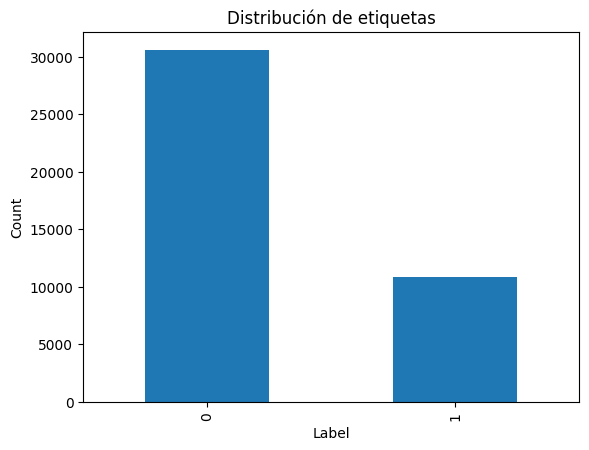

In [159]:
# Ver el conteo de cada etiqueta
label_counts = df_label['label'].value_counts()
print("Distribución de etiquetas:\n", label_counts)

# Calcular el porcentaje de cada etiqueta
label_percentage = df_label['label'].value_counts(normalize=True) * 100
print("Porcentaje de cada etiqueta:\n", label_percentage)

# Opcional: visualizar la distribución
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribución de etiquetas')
plt.show()

In [160]:
X = df[['Infraction_GGO', 'Base_6187', 'Infraction_ZTNC', 'Expenditure_YTR',
       'Base_36384', 'Infraction_EHZP', 'Expenditure_RGD', 'Base_8511',
       'Infraction_JYZB', 'Infraction_EYU', 'Expenditure_UWVG', 'Base_36516',
       'Expenditure_HRQ', 'Infraction_VTR', 'Risk_2102', 'Risk_4804',
       'Expenditure_XDD', 'Risk_8742', 'Infraction_VHU', 'Risk_2380',
       'Risk_0454', 'Expenditure_HKXV', 'Infraction_MHM', 'Risk_3506',
       'Expenditure_GCAO', 'Risk_9367', 'Base_7910', 'Risk_6178', 'Risk_6197',
       'Infraction_WVC', 'Infraction_QVSL', 'Infraction_QXUM',
       'Infraction_IMIM', 'Infraction_LTIS', 'Infraction_SDWM', 'Base_5441',
       'Infraction_PTY', 'Infraction_LMHK', 'Infraction_XEPQ',
       'Infraction_WVAW', 'Infraction_KEJT', 'Infraction_TFOY',
       'Infraction_SIA', 'Infraction_CZXL', 'Infraction_QEY', 'Base_52892',
       'Infraction_VHHP', 'Risk_5270', 'Infraction_QWWW', 'Infraction_YQXM']]
y = df_label['label']


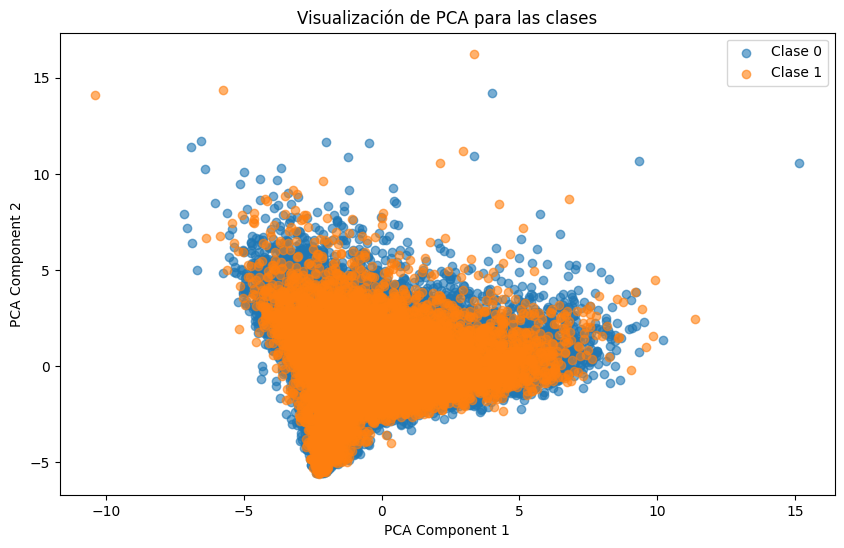

In [161]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los dos primeros componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Clase 0', alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Clase 1', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualización de PCA para las clases')
plt.legend()
plt.show()

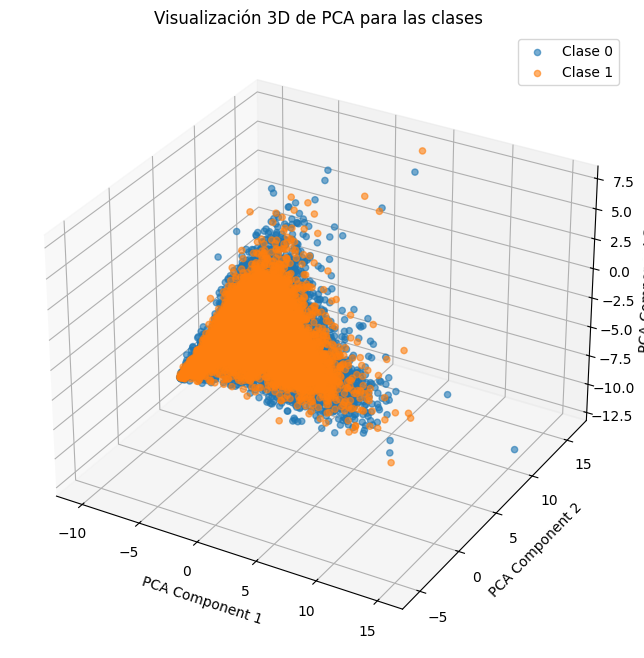

In [162]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configurar PCA con 3 componentes
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2], label='Clase 0', alpha=0.6)
ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2], label='Clase 1', alpha=0.6)

# Etiquetas de los ejes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Visualización 3D de PCA para las clases')
ax.legend()

plt.show()


In [163]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [164]:
# Ver el conteo de cada etiqueta
label_counts = y_resampled.value_counts()
print("Distribución de etiquetas:\n", label_counts)

# Calcular el porcentaje de cada etiqueta
label_percentage = y_resampled.value_counts(normalize=True) * 100
print("Porcentaje de cada etiqueta:\n", label_percentage)

Distribución de etiquetas:
 label
0    30611
1    30611
Name: count, dtype: int64
Porcentaje de cada etiqueta:
 label
0    50.0
1    50.0
Name: proportion, dtype: float64


In [165]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61222 entries, 0 to 61221
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Infraction_GGO    61222 non-null  float64
 1   Base_6187         61222 non-null  float64
 2   Infraction_ZTNC   61222 non-null  float64
 3   Expenditure_YTR   61222 non-null  float64
 4   Base_36384        61222 non-null  float64
 5   Infraction_EHZP   61222 non-null  float64
 6   Expenditure_RGD   61222 non-null  float64
 7   Base_8511         61222 non-null  float64
 8   Infraction_JYZB   61222 non-null  float64
 9   Infraction_EYU    61222 non-null  float64
 10  Expenditure_UWVG  61222 non-null  float64
 11  Base_36516        61222 non-null  float64
 12  Expenditure_HRQ   61222 non-null  float64
 13  Infraction_VTR    61222 non-null  float64
 14  Risk_2102         61222 non-null  float64
 15  Risk_4804         61222 non-null  float64
 16  Expenditure_XDD   61222 non-null  float6

## 1.8. Separacion en Entrenamiento y Test
[volver al indice](#0-indice)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

X_train.to_csv('./data/output/clean_train_data.csv', index=False)
X_test.to_csv('./data/output/clean_test_data.csv', index=False)
y_train.to_csv('./data/output/clean_train_label.csv', index=False)
y_test.to_csv('./data/output/clean_test_label.csv', index=False)


---
# 
Este Práctica se ha realizado por el Grupo_26 -> Pedro Llinas Ferrer y Andrés Benito Llorente